<div style='text-align: center;'>
<img src="../images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 9

## Dr P. V. Johnson
## Department of Mathematics

Last time we demonstrated the explicit finite difference method
- We showed how accurate it can be,
- how time step restrictions make it inefficient,
- and how interpolation can maintain accuracy in between grid points.
- This time we cover the Crank-Nicolson Method.

## Crank-Nicolson Method

As introduced at the end of the last lecture the Crank-Nicolson scheme 
works by evaluating the derivatives at $V(S, t + \Delta t/2)$.
The main advantages of this is that the error in the time derivative is 
now $(\Delta t)^2$ rather than $\Delta t$ and that there are no 
stability constraints.
The only problem with using the Crank-Nicolson method rather than the explicit method is that we will need to use three option 
values in the future $(t+\Delta t)$ to calculate three option values not $(t)$. This will make the scheme slightly  harder.

# Task

- Use finite difference to generate $O((\Delta S)^2,(\Delta t)^2)$ approximations to the derivatives in the BS PDE.


Take a Taylor series expansion with respect to $t$ around the point $(S,t+1/2\Delta t)$, we have
$$	V(S,t)=V(S,t+1/2\Delta t)-\tfrac12\Delta t\frac{\partial V}{\partial t}
	+\tfrac18 (\Delta t)^2\frac{\partial ^2V}{\partial t^2} +O((\Delta t)^3) 
	\tag{*}
$$
and
$$
V(S,t+\Delta t)=V(S,t+1/2\Delta t)+\tfrac12\Delta t\frac{\partial V}{\partial t}
+\tfrac18 (\Delta t)^2\frac{\partial ^2V}{\partial t^2} +O((\Delta t)^3) .
\tag{**}
$$
Subtracting (*) away from (**) and dividing by $\Delta t$ we are left with
$$
\frac{V(S,t+\Delta t)-V(S,t)}{\Delta t} = \frac{\partial V}{\partial t}
 +O((\Delta t)^2) .
$$

So how do we find $\frac{\partial V}{\partial S}$ at $(S,t+1/2\Delta t)$ if there is not any grid points at that time level?
Next consider 
$$\frac{\partial V}{\partial S}(S,t)=\frac{V(S+\Delta S,t)-V(S-\Delta S,t)}{2\Delta S}+O((\Delta S)^2)$$
and 
$$\frac{\partial V}{\partial S}(S,t+\Delta t)=\frac{V(S+\Delta S,t+\Delta t)-V(S-\Delta S,t+\Delta t)}{2\Delta S}+O((\Delta S)^2)$$
so
$$\frac{\partial V}{\partial S}(S,t+1/2\Delta t)=\frac{V(S+\Delta S,t)-V(S-\Delta S,t)+V(S+\Delta S,t+\Delta t)-V(S-\Delta S,t+\Delta t)}{4\Delta S}+O((\Delta S)^2,(\Delta t)^2)$$
is a second order approximation at $(S,t+1/2\Delta t)$. We can do similar for $\frac{\partial^2 V}{\partial S^2}$, and even for example the term
$$
 - r V(S,t+1/2\Delta t)= -r \tfrac12 \big(V(S,t) + V(S,t+\Delta t) \big) +O((\Delta t)^2)
$$
must be approximated at the half time step.


# Crank-Nicolson Scheme

From our new approximations, in terms of $V^i_j$ we have
$$\frac{\partial V}{\partial t}\approx \frac{V_j^{i+1}-V_j^i}{\Delta t}$$
$$\frac{\partial V}{\partial S}\approx \frac{1}{4\Delta S}(V^i_{j+1}-
V^i_{j-1}+V_{j+1}^{i+1}-
V_{j-1}^{i+1})$$
$$\frac{\partial^2 V}{\partial S^2}\approx \frac{1}{2\Delta S^2}(V^i_{j+1}-2V_j^i
+V^i_{j-1}+V_{j+1}^{i+1}-2V_j^{i+1}
+V_{j-1}^{i+1})$$
$$V\approx \frac{1}{2}(V^i_{j}+V_{j}^{i+1})$$
Substituting these approximations into the BS PDE, and given that here the $V^i$ values are all unknown, we rearrange our equations to have the known values on one side and the 
unknown values on the other.
$$
  \tfrac14(\sigma^2j^2-rj)V_{j-1}^i
+(-\frac{\sigma^2j^2}{2}-\frac{r}{2}
-\frac{1}{\Delta t})V_j^i
+\tfrac14(\sigma^2j^2+rj)
V_{j+1}^i=d_j$$
where
$$
d_=-\tfrac14(\sigma^2j^2-rj)V_{j-1}^{i+1}-(-\frac{\sigma^2j^2}{2}
-\frac{r}{2}+\frac{1}{\Delta t})
V_j^{i+1}-\frac14(\sigma^2j^2+rj)V_{j+1}^{i+1}
$$

# Linear Algebra Problem


We can rewrite the valuation problem in terms of a matrix as follows:
$$\begin{pmatrix}
b_0&c_0&0&0&.&.&.&.&0\\
a_1&b_1&c_1&0&.&.&.&.&.\\
0&a_2&b_2&c_2&0&.&.&.&.\\
.&.&a_3&b_3&c_3&.&.&.&.\\
.&.&.&.&.&.&.&.&.\\
.&.&.&.&a_j&b_j&c_j&.&.\\
.&.&.&.&.&.&.&.&.\\
0&.&.&.&.&.&.&a_{jmax}&b_{jmax}
\end{pmatrix}
\begin{pmatrix}
V_0^i\\V_1^i\\V_2^i\\V_3^i\\.\\.\\V_{jmax-1}^i\\V_{jmax}^i
\end{pmatrix}
=\begin{pmatrix}
d_0^i\\d_1^i\\d_2^i\\d_3^i\\.\\.\\d_{jmax-1}^i\\d_{jmax}^i
\end{pmatrix}
$$
where for $1\leq j <jmax$ we have:
$$a_j=\tfrac14(\sigma^2j^2-rj)$$
$$b_j=-\frac{\sigma^2j^2}{2}-\frac{r}{2}-\frac{1}{\Delta t}$$
$$c_j=\tfrac14(\sigma^2j^2+rj)$$
$$d_j=-\tfrac14(\sigma^2j^2-rj)V_{j-1}^{i+1}-(-\frac{\sigma^2j^2}{2}-\frac{r}{2}+\frac{1}{\Delta
t})V_j^{i+1}-\tfrac14(\sigma^2j^2+rj)V_{j+1}^{i+1}
$$
For $j=0$ and $j=jmax$, we will need to use the boundary conditions of the problem.

First consider the payoff at expiry $t=T$, we have $V(S,T)= \max(X-S,0)$ so this can be written
$$
V_j^{imax} = \max(X - S_j , 0).
$$
For put option, at $S=0$, we have $V_0^i = X e^{-r(T-i\Delta t)}$ so to convert into matrix form we write
$$
b_0 V_0^i +c_0 V_1^i = d_0
$$
and therefore $b_0=1$, $c_0=0$ and $d_0=Xe^{-r(T-i\Delta t)}$.

Now at upper boundary $V_{jmax}^i = 0$ so we write 
$$
a_{jmax} V_{jmax-1}^i +b_{jmax} V_{jmax}^i = d_{jmax}
$$
and therefore $a_{jmax}=0$, $b_{jmax}=0$ and $d_{jmax}=0$.


# Matrix Form

The matrix problem to solve is therefore
$$
A \boldsymbol{V^i} = \boldsymbol{d^{i+1}}
$$
where $\boldsymbol{d^{i+1}}$ depends on the value function $V$ at $t+\Delta t$.
Note that this matrix is extremely sparse -- there are only 3 non zero diagonals.

In [51]:
# To get started import some libraries
import numpy
import matplotlib.pyplot as plt

In [58]:
# setup the parameters
sigma = 0.4
r = 0.05
X = 2
T = 1
imax = 40
jmax = 40

In [59]:
## calculate the step size and then setup storage for the value
dS = 2*X / jmax
dt = T / imax

S = numpy.zeros(jmax+1)
t = numpy.zeros(imax+1)
vNew = numpy.zeros(jmax+1)
vOld = numpy.zeros(jmax+1)

# calculate the values of S_j and t^i and check they work as expected
for i in range(imax+1):
    t[i] = i*dt

for j in range(jmax+1):
    S[j] = j*dS

# first enter the value of the option at expiry
for j in range(jmax+1):
    vOld[j] = max( X - S[j] , 0.0 )
    vNew[j] = max( X - S[j] , 0.0 )

# Tasks

- setup the matrix problem
- solve the matrix using a sparse solver

We use diagonal storage to build the matrix, in this case we have a central diagonal ($b_j$) plus $l=1$ lower diagonal ($a_j$) and $u=1$ diagonal above ($c_j$). So we create a $3\times (jmax+1)$ matrix $AB$ with the following relationship to $A$, 
$$
AB_{u + i - j, j} = A_{i,j}
$$
Once in this special format we can call the `solve_banded` function.

See the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html#scipy.linalg.solve_banded) for more details.

In [60]:
from scipy.linalg import solve_banded

In [61]:
A_banded = numpy.zeros(shape=(3,jmax+1))
u=1
l=1
l_and_u = (l, u)

# b_0 V_0 + c_0 V_1 = d_0
A_banded[1][0] = 1.0 # b_0
A_banded[0][1] = 0.0 # c_0
# populate middle rows
for j in range(1,jmax):
    # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
    A_banded[2][j-1] = 0.25*(sigma*sigma*j*j - r*j) # a_j
    A_banded[1][j] = -1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
    A_banded[0][j+1] = 0.25*(sigma*sigma*j*j + r*j) # c_j
# populate last row
# a_jmax V_jmax-1 + b_jmax V_jmax = d_jmax
A_banded[2][jmax-1] = 0.0 # a_jmax 
A_banded[1][jmax] = 1.0 # b_jmax

# print banded matrix
print(A_banded)

[[ 0.00000e+00  0.00000e+00  5.25000e-02  1.85000e-01  3.97500e-01
   6.90000e-01  1.06250e+00  1.51500e+00  2.04750e+00  2.66000e+00
   3.35250e+00  4.12500e+00  4.97750e+00  5.91000e+00  6.92250e+00
   8.01500e+00  9.18750e+00  1.04400e+01  1.17725e+01  1.31850e+01
   1.46775e+01  1.62500e+01  1.79025e+01  1.96350e+01  2.14475e+01
   2.33400e+01  2.53125e+01  2.73650e+01  2.94975e+01  3.17100e+01
   3.40025e+01  3.63750e+01  3.88275e+01  4.13600e+01  4.39725e+01
   4.66650e+01  4.94375e+01  5.22900e+01  5.52225e+01  5.82350e+01
   6.13275e+01]
 [ 1.00000e+00 -4.01050e+01 -4.03450e+01 -4.07450e+01 -4.13050e+01
  -4.20250e+01 -4.29050e+01 -4.39450e+01 -4.51450e+01 -4.65050e+01
  -4.80250e+01 -4.97050e+01 -5.15450e+01 -5.35450e+01 -5.57050e+01
  -5.80250e+01 -6.05050e+01 -6.31450e+01 -6.59450e+01 -6.89050e+01
  -7.20250e+01 -7.53050e+01 -7.87450e+01 -8.23450e+01 -8.61050e+01
  -9.00250e+01 -9.41050e+01 -9.83450e+01 -1.02745e+02 -1.07305e+02
  -1.12025e+02 -1.16905e+02 -1.21945e+02 -1.27

In [62]:
for i in range(imax-1,-1,-1):
    # Create a vector for multiplication
    d = numpy.zeros(jmax+1)
    d[0] = X*numpy.exp(-r*(T-i*dt))
    for j in range(1,jmax):
        aa = 0.25*(sigma*sigma*j*j - r*j) # a_j
        bb = 1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j + 2./dt
        cc = 0.25*(sigma*sigma*j*j + r*j) # c_j
        d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
    d[jmax] = 0.0

    # Perform sparse matrix-vector multiplication
    vNew = solve_banded(l_and_u,A_banded,d)
    
    vOld = numpy.copy(vNew)

In [63]:
vNew

array([1.90245885, 1.80245884, 1.70245886, 1.60245947, 1.5024669 ,
       1.40251725, 1.30273767, 1.20343286, 1.10514606, 1.00864954,
       0.91486476, 0.82474672, 0.73917224, 0.65885733, 0.58431231,
       0.51583103, 0.45350513, 0.39725341, 0.34685794, 0.30200064,
       0.26229686, 0.22732384, 0.19664351, 0.16981981, 0.14643109,
       0.12607841, 0.10839066, 0.09302706, 0.07967797, 0.0680643 ,
       0.05793612, 0.04907074, 0.04127052, 0.03436053, 0.02818631,
       0.02261164, 0.01751654, 0.01279536, 0.00835512, 0.004114  ,
       0.        ])

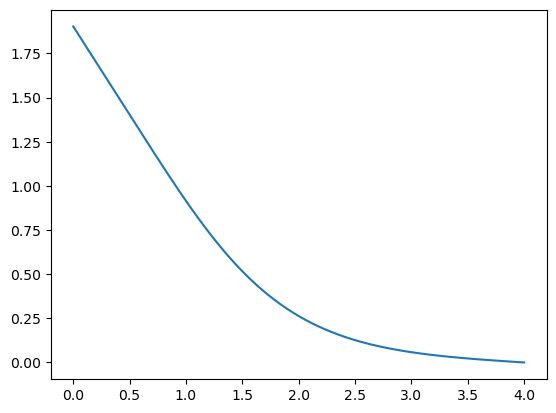

In [50]:
plt.plot(S,vNew)

# Tasks:
    
- Try different values of `imax` and `jmax` -- what do you notice?
- Put your algorithm in a function, and return the solution:
    - Parameters: `sigma`, `r`, `X`, `T`, `SU`, `imax`, `jmax`
    - return: `vNew`, `S`
- Try plotting the solution $V(S,t=0)$ against $S$ for different values of $S^U$, $imax$ and $jmax$

In [64]:
def crankNicolson_EuroPut( X,T ,r,sigma , SU,imax,jmax ):
    ## calculate the step size and then setup storage for the value
    dS = SU / jmax
    dt = T / imax

    S = numpy.zeros(jmax+1)
    t = numpy.zeros(imax+1)
    vNew = numpy.zeros(jmax+1)
    vOld = numpy.zeros(jmax+1)

    # calculate the values of S_j and t^i and check they work as expected
    for i in range(imax+1):
        t[i] = i*dt

    for j in range(jmax+1):
        S[j] = j*dS

    # first enter the value of the option at expiry
    for j in range(jmax+1):
        vOld[j] = max( X - S[j] , 0.0 )
        vNew[j] = max( X - S[j] , 0.0 )
        
    A_banded = numpy.zeros(shape=(3,jmax+1))
    u=1
    l=1
    l_and_u = (l, u)

    # b_0 V_0 + c_0 V_1 = d_0
    A_banded[1][0] = 1.0 # b_0
    A_banded[0][1] = 0.0 # c_0
    # populate middle rows
    for j in range(1,jmax):
        # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
        A_banded[2][j-1] = 0.25*(sigma*sigma*j*j - r*j) # a_j
        A_banded[1][j] = -1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
        A_banded[0][j+1] = 0.25*(sigma*sigma*j*j + r*j) # c_j
    # populate last row
    # a_jmax V_jmax-1 + b_jmax V_jmax = d_jmax
    A_banded[2][jmax-1] = 0.0 # a_jmax 
    A_banded[1][jmax] = 1.0 # b_jmax

    for i in range(imax-1,-1,-1):
        # Create a vector for multiplication
        d = numpy.zeros(jmax+1)
        d[0] = X*numpy.exp(-r*(T-i*dt))
        for j in range(1,jmax):
            aa = 0.25*(sigma*sigma*j*j - r*j) # a_j
            bb = 1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j + 2./dt
            cc = 0.25*(sigma*sigma*j*j + r*j) # c_j
            d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
        d[jmax] = 0.0

        # Perform sparse matrix-vector multiplication
        vNew = solve_banded(l_and_u,A_banded,d)
        
        vOld = numpy.copy(vNew)
        
    return S,vNew

In [65]:
S,vNew = crankNicolson_EuroPut( X,T, r,sigma, 2*X,40,40)

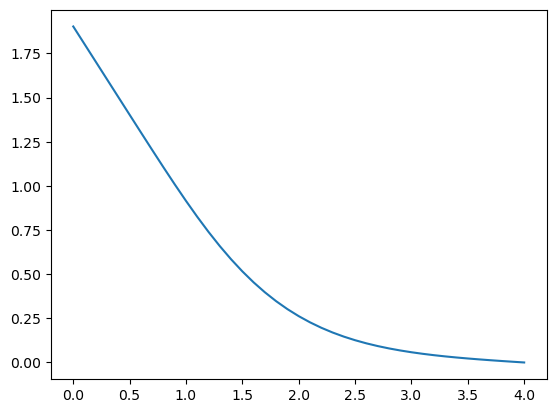

In [66]:
plt.plot(S,vNew)

In [120]:
valueOld=1.
diffOld=1.

for k in range(0,8):
    n = 10
    imax = (2**k)*n
    jmax = (2**k)*8*n
    SU = 8*X
    # run calculation with imax different values
    # increasing by factor of 2
    S,vNew = crankNicolson_EuroPut( X,T, r,sigma,SU,imax,jmax)
    
    # get value
    value = numpy.interp( X , S, vNew)
    
    # get difference between last calculation
    diff = value - valueOld
    
    # try Richardson extrapolation to improve result
    extrap = (4*value - valueOld)/3.
    
    # if second order diffOld/diff -> 4
    print(imax , jmax, value,diffOld/diff,extrap )
    
    valueOld = value
    diffOld = diff

10 80 0.26069470006177436 -1.3526211702845323 0.01425960008236582
20 160 0.2623660550124859 -442.3388937361817 0.26292317332938975
40 320 0.2627801610200964 4.03605579246654 0.2629181963559665
80 640 0.2628834619378179 4.008735031055313 0.2629178955770584
160 1280 0.26290927399479336 4.002041287133186 0.26291787801378513
320 2560 0.26291572659659046 4.000255677799605 0.26291787746385614
640 5120 0.262917339924261 3.9995606069593324 0.2629178777001511
1280 10240 0.2629177433713846 3.998857783154017 0.26291787785375914


# Efficiency

- increasing imax and jmax will increase computation time
- increasing $S^u$ (and keeping jmax fixed) will **increase** $\Delta S$ and therefore increase errors from the numerical scheme, but reduces grid truncation errors
- choose $S^U$ to balance competing effects
- may find the ratio between imax and jmax can be altered to improve computation and maintain accuracy, we should aim for the size of the errors in each to be same size.

# Stability and Convergence of the Scheme

Crank-Nicolson is stable (although prone to *ringing*) and second order convergent.


# Tasks


- derive the truncation errors of the scheme
- by choosing different values of $\Delta t$ and $\Delta S$, verify the convergence rate of the method
- analyse the errors, comparing with the analytic solution 
- try interpolation techniques to get the values in between the grid points.
- use `numba` to speed up your code

# Solving A New Problem...

Consider a European call option with dividends. We have a new PDE
$$
\frac{\partial V}{\partial t}  + \frac12 \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
+(r-q)S\frac{\partial V}{\partial S} - r V = 0
$$
and terminal condition
$$
V(S,t=T) = \max(S-X,0).
$$

We need to:
- adjust the scheme to reflect the new PDE
- adapt the terminal conditions
- adapt the boundary conditions

The structure of the problem and the solver remain the same.

In [105]:
def crankNicolson_EuroCallDividends( X,T ,r,q,sigma , SU,imax,jmax ):
    ## calculate the step size and then setup storage for the value
    dS = SU / jmax
    dt = T / imax

    S = numpy.zeros(jmax+1)
    t = numpy.zeros(imax+1)
    vNew = numpy.zeros(jmax+1)
    vOld = numpy.zeros(jmax+1)

    # calculate the values of S_j and t^i and check they work as expected
    for i in range(imax+1):
        t[i] = i*dt

    for j in range(jmax+1):
        S[j] = j*dS

    # first enter the value of the option at expiry
    for j in range(jmax+1):
        vOld[j] = max( S[j] - X , 0.0 )
        vNew[j] = max( S[j] - X , 0.0 )
        
    A_banded = numpy.zeros(shape=(3,jmax+1))
    u=1
    l=1
    l_and_u = (l, u)

    # b_0 V_0 + c_0 V_1 = d_0
    # V_0^i = 0
    A_banded[1][0] = 1.0 # b_0
    A_banded[0][1] = 0.0 # c_0
    # populate middle rows
    for j in range(1,jmax):
        # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
        A_banded[2][j-1] = 0.25*(sigma*sigma*j*j - (r-q)*j) # a_j
        A_banded[1][j] = -1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
        A_banded[0][j+1] = 0.25*(sigma*sigma*j*j + (r-q)*j) # c_j
    # populate last row
    # a_jmax V_jmax-1 + b_jmax V_jmax = d_jmax
    # V_jmax^i = S_jmax * e^(-q(T-i*dt)) - X *e^(-r(T-i*dt)) 
    A_banded[2][jmax-1] = 0.0 # a_jmax 
    A_banded[1][jmax] = 1.0 # b_jmax

    for i in range(imax-1,-1,-1):
        # Create a vector for multiplication
        d = numpy.zeros(jmax+1)
        d[0] = 0.0
        for j in range(1,jmax):
            aa = 0.25*(sigma*sigma*j*j - (r-q)*j) # a_j
            bb = 1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j + 2./dt
            cc = 0.25*(sigma*sigma*j*j + (r-q)*j) # c_j
            d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
#        d[jmax] = S[jmax]*numpy.exp(-q*(T-i*dt)) - X*numpy.exp(-r*(T-i*dt))
        d[jmax] = 0.0
#        d[jmax] = S[jmax] - X*numpy.exp(-r*(T-i*dt))

        # Perform sparse matrix-vector multiplication
        vNew = solve_banded(l_and_u,A_banded,d)
        
        vOld = numpy.copy(vNew)
        
    return S,vNew

In [106]:
q = 0.04

SOld,vNewTerrible = crankNicolson_EuroCallDividends( X,T, r,q,sigma, 2*X,40,40)

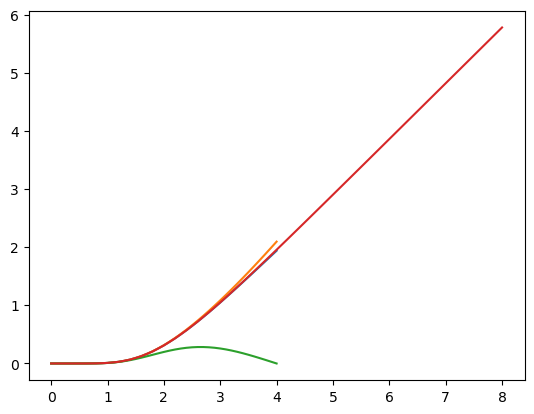

In [107]:
plt.plot(SOld,vNew)
plt.plot(SOld,vNewWrong)
plt.plot(SOld,vNewTerrible)
plt.plot(S,vNew4X)

In the plot above we try the following boundary conditions:
- Blue line -- $V_{jmax}^i= S_{jmax} e^{-q(T-i*\Delta t)} - X e^{-r(T-i*\Delta t)}$ with $S^U=2X$
- Red line -- $V_{jmax}^i= S_{jmax} e^{-q(T-i*\Delta t)} - X e^{-r(T-i*\Delta t)}$ with $S^U=4X$
- Orange line -- $V_{jmax}^i= S_{jmax} - X e^{-r(T-i*\Delta t)}$ with $S^U=2X$
- Green line -- $V_{jmax}^i = 0 $ with $S^U=2X$